<a href="https://colab.research.google.com/github/ahmedhas32/Data-science-projects/blob/master/Capstone_project_Recognizing_Arabic_Letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import keras

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving csvTestImages 3360x1024.csv to csvTestImages 3360x1024.csv
Saving csvTestLabel 3360x1.csv to csvTestLabel 3360x1.csv
Saving csvTrainImages 13440x1024.csv to csvTrainImages 13440x1024.csv
Saving csvTrainLabel 13440x1.csv to csvTrainLabel 13440x1.csv


In [0]:
train_data = pd.read_csv('csvTrainImages 13440x1024.csv', header = None)
train_label = pd.read_csv('csvTrainLabel 13440x1.csv', header = None)
test_data = pd.read_csv('csvTestImages 3360x1024.csv', header = None)
test_label = pd.read_csv('csvTestLabel 3360x1.csv', header = None)

In [0]:
train_data = train_data.iloc[:,:].values.astype('float32')
train_label = train_label.iloc[:,:].values.astype('int32')-1
test_data = test_data.iloc[:,:].values.astype('float32')
test_label = test_label.iloc[:,:].values.astype('int32')-1

In [0]:
pd.DataFrame(train_label).head()

,0
0,0
1,0
2,0
3,0
4,0


In [0]:
pd.DataFrame(train_label).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 1 columns):
0    13440 non-null int32
dtypes: int32(1)
memory usage: 52.6 KB


In [0]:
def row_calculator(number_of_images, number_of_columns):
    if number_of_images % number_of_columns != 0:
        return (number_of_images / number_of_columns)+1
    else:
        return (number_of_images / number_of_columns)

In [0]:
def display_image(x, img_size, number_of_images):
    plt.figure(figsize = (8, 7))
    if x.shape[0] > 0:
        n_samples = int(x.shape[0]/4)
        x = x.reshape(n_samples, img_size, img_size)
        number_of_rows = row_calculator(number_of_images, 4)
        for i in range(number_of_images):
            plt.subplot(number_of_rows, 4, i+1)
            plt.imshow(x[i])

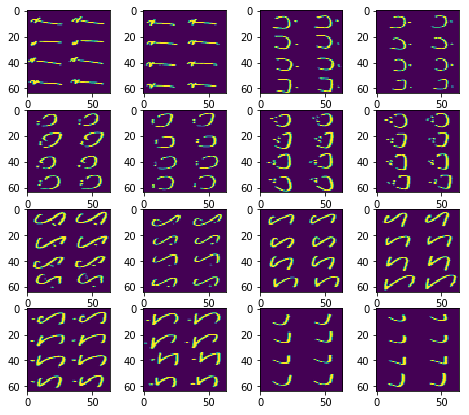

In [0]:
display_image(train_data, 64,16)
plt.show()

In [0]:
labelencoder_X = LabelEncoder()
train_label = labelencoder_X.fit_transform(train_label)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
train_data.shape

(13440, 1024)

In [0]:
train_data = train_data.reshape([-1, 32, 32, 1])
test_data = test_data.reshape([-1, 32, 32, 1])

In [0]:
train_label =keras.utils.np_utils.to_categorical(train_label,28)

In [0]:
test_label =keras.utils.np_utils.to_categorical(test_label,28)

In [0]:
train_label_data = pd.DataFrame(train_label)

In [0]:
train_label_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
for i in train_label_data.columns :
    print(train_label_data[train_label_data[i]==1].count())
    


0     480
1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
13    480
14    480
15    480
16    480
17    480
18    480
19    480
20    480
21    480
22    480
23    480
24    480
25    480
26    480
27    480
dtype: int64
0     480
1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
13    480
14    480
15    480
16    480
17    480
18    480
19    480
20    480
21    480
22    480
23    480
24    480
25    480
26    480
27    480
dtype: int64
0     480
1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
12    480
13    480
14    480
15    480
16    480
17    480
18    480
19    480
20    480
21    480
22    480
23    480
24    480
25    480
26    480
27    480
dtype: int64
0     480
1     480
2     480
3     480
4     480
5     480
6     480
7     480
8     480
9     480
10    480
11    480
1

In [0]:
datagen = ImageDataGenerator(rescale=1.0/255.0,
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range = 0.1,  
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)

In [0]:
datagen.fit(train_data)


In [0]:
# prepare an iterators to scale images
train_iterator = datagen.flow(train_data, train_label, batch_size=64)
test_iterator = datagen.flow(test_data, test_label, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator), len(test_iterator)))
# confirm the scaling works
batchX, batchy = train_iterator.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
# define mode

Batches train=210, test=53
Batch shape=(64, 32, 32, 1), min=0.000, max=1.000


In [0]:
recognizer = Sequential()

recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
recognizer.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2)))
recognizer.add(Dropout(0.5))


recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
recognizer.add(Dropout(0.5))


recognizer.add(Flatten())
recognizer.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
recognizer.add(Dense(units = 256, activation = "relu"))
recognizer.add(Dropout(0.5))
recognizer.add(Dense(28, activation = "softmax"))

In [0]:
recognizer.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [0]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [0]:
recognizer.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:


recognizer.fit_generator(train_iterator,epochs = 30, verbose = 2, steps_per_epoch=train_data.shape[0] // 100)

Epoch 1/30
 - 5s - loss: 2.8541 - acc: 0.1542
Epoch 2/30
 - 3s - loss: 1.9528 - acc: 0.3619
Epoch 3/30
 - 3s - loss: 1.4805 - acc: 0.5027
Epoch 4/30
 - 3s - loss: 1.1742 - acc: 0.5947
Epoch 5/30
 - 3s - loss: 0.9771 - acc: 0.6587
Epoch 6/30
 - 3s - loss: 0.8484 - acc: 0.7099
Epoch 7/30
 - 3s - loss: 0.7424 - acc: 0.7423
Epoch 8/30
 - 3s - loss: 0.6644 - acc: 0.7755
Epoch 9/30
 - 3s - loss: 0.6340 - acc: 0.7905
Epoch 10/30
 - 3s - loss: 0.5845 - acc: 0.8117
Epoch 11/30
 - 3s - loss: 0.5375 - acc: 0.8306
Epoch 12/30
 - 3s - loss: 0.4808 - acc: 0.8420
Epoch 13/30
 - 3s - loss: 0.4685 - acc: 0.8458
Epoch 14/30
 - 3s - loss: 0.4502 - acc: 0.8537
Epoch 15/30
 - 3s - loss: 0.4195 - acc: 0.8653
Epoch 16/30
 - 3s - loss: 0.3787 - acc: 0.8777
Epoch 17/30
 - 3s - loss: 0.3826 - acc: 0.8825
Epoch 18/30
 - 3s - loss: 0.3766 - acc: 0.8774
Epoch 19/30
 - 3s - loss: 0.3690 - acc: 0.8813
Epoch 20/30
 - 3s - loss: 0.3493 - acc: 0.8895
Epoch 21/30
 - 3s - loss: 0.3246 - acc: 0.8967
Epoch 22/30
 - 3s - lo

In [0]:
test_acc1=[]

In [0]:
for i in range(10):
    _, acc = recognizer.evaluate_generator(test_iterator, steps=len(test_iterator))
    print('Test Accuracy {0}: {1}' .format(i+1 , np.round((acc * 100),2)))
    test_acc1.append(acc * 100)
    

Test Accuracy 1: 94.23
Test Accuracy 2: 93.63
Test Accuracy 3: 94.38
Test Accuracy 4: 94.97
Test Accuracy 5: 94.38
Test Accuracy 6: 94.08
Test Accuracy 7: 94.64
Test Accuracy 8: 94.55
Test Accuracy 9: 93.93
Test Accuracy 10: 94.35


In [0]:
basic_code_results = pd.Series(test_acc1)

In [0]:
basic_code_results.mean()

94.3125

In [0]:
recognizer2 = Sequential()

recognizer2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,1)))
recognizer2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
recognizer2.add(MaxPool2D(pool_size=(2,2)))
recognizer2.add(Dropout(0.2))


recognizer2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer2.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
recognizer2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
recognizer2.add(Dropout(0.2))


recognizer2.add(Flatten())
recognizer2.add(Dense(units = 256, input_dim = 1024, activation = 'relu'))
recognizer2.add(Dense(units = 256, activation = "relu"))
recognizer2.add(Dropout(0.5))
recognizer2.add(Dense(28, activation = "softmax"))

In [0]:
recognizer2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
recognizer2.fit_generator(train_iterator,epochs = 30, verbose = 2, steps_per_epoch=train_data.shape[0] // 100)

Epoch 1/30
 - 4s - loss: 2.6932 - acc: 0.1919
Epoch 2/30
 - 3s - loss: 1.6615 - acc: 0.4440
Epoch 3/30
 - 3s - loss: 1.1549 - acc: 0.6084
Epoch 4/30
 - 3s - loss: 0.9111 - acc: 0.6903
Epoch 5/30
 - 3s - loss: 0.7382 - acc: 0.7515
Epoch 6/30
 - 3s - loss: 0.6045 - acc: 0.8036
Epoch 7/30
 - 3s - loss: 0.5373 - acc: 0.8202
Epoch 8/30
 - 3s - loss: 0.4528 - acc: 0.8498
Epoch 9/30
 - 3s - loss: 0.4293 - acc: 0.8572
Epoch 10/30
 - 3s - loss: 0.3966 - acc: 0.8721
Epoch 11/30
 - 3s - loss: 0.3609 - acc: 0.8858
Epoch 12/30
 - 4s - loss: 0.3320 - acc: 0.8932
Epoch 13/30
 - 4s - loss: 0.3108 - acc: 0.9015
Epoch 14/30
 - 3s - loss: 0.2933 - acc: 0.9090
Epoch 15/30
 - 3s - loss: 0.2811 - acc: 0.9110
Epoch 16/30
 - 3s - loss: 0.2678 - acc: 0.9148
Epoch 17/30
 - 3s - loss: 0.2576 - acc: 0.9179
Epoch 18/30
 - 3s - loss: 0.2456 - acc: 0.9221
Epoch 19/30
 - 3s - loss: 0.2333 - acc: 0.9274
Epoch 20/30
 - 3s - loss: 0.2460 - acc: 0.9230
Epoch 21/30
 - 3s - loss: 0.2124 - acc: 0.9317
Epoch 22/30
 - 3s - lo

In [0]:
test_acc2 = []

In [0]:
for i in range(10):
    _, acc = recognizer2.evaluate_generator(test_iterator, steps=len(test_iterator))
    print('Test Accuracy {0}: {1}' .format(i+1 , np.round((acc * 100),2)))
    test_acc2.append(np.round((acc * 100),2))
    

Test Accuracy 1: 95.3
Test Accuracy 2: 95.24
Test Accuracy 3: 95.71
Test Accuracy 4: 95.74
Test Accuracy 5: 95.65
Test Accuracy 6: 95.54
Test Accuracy 7: 95.57
Test Accuracy 8: 95.27
Test Accuracy 9: 95.39
Test Accuracy 10: 95.6


In [0]:
final_code_results=pd.Series(test_acc2)

In [0]:
np.round((final_code_results.mean()),2)

95.5

In [0]:
stats.ttest_ind(basic_code_results, final_code_results)

Ttest_indResult(statistic=-8.9230024692117098, pvalue=5.0043411901139085e-08)

In [0]:
np.round((final_code_results.mean()),2)

95.5

In [0]:
test_predictions = recognizer2.predict(test_data)
test_predictions = np.round(test_predictions)

In [0]:
test_predictions1=pd.DataFrame(test_predictions)

In [0]:
test_label1=pd.DataFrame(test_label)

In [0]:
incorrect_label_indices= (test_predictions1.idxmax(axis=1) != test_label1.idxmax(axis=1))

In [0]:
misclassified_data=test_data[incorrect_label_indices]
new_labels = test_label1[incorrect_label_indices]
incorrect_prediction = test_predictions1[incorrect_label_indices]

In [0]:
misclassified_data.shape

(486, 32, 32, 1)

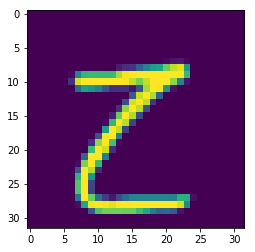

In [0]:
plt.imshow(misclassified_data[0].squeeze().T)


In [0]:
pd.Series(incorrect_prediction.idxmax(axis=1)).reset_index()[0][0]

4

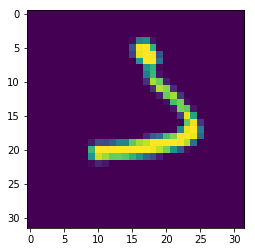

In [0]:
plt.imshow(misclassified_data[1].squeeze().T)

In [0]:
pd.Series(incorrect_prediction.idxmax(axis=1)).reset_index()[0][1]

7